In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

# Analisi del dataset

## Vertices

In [9]:
vertices = pd.read_csv("Dataset/disease_vertices.csv", sep=";")
vertices = vertices.set_index('id')

vertices

,label,timeset,kind,type
id,,,,
55,Deafness,NaN,disease,"Ear,Nose,Throat"
47,Leukemia,NaN,disease,Cancer
114,Colon cancer,NaN,disease,Cancer
45,Retinitis pigmentosa,NaN,disease,Ophthamological
87,Diabetes mellitus,NaN,disease,Endocrine
...,...,...,...,...
1303,Infantile spasm syndrome,NaN,disease,Neurological
1304,Partington syndrome,NaN,disease,Neurological
1305,Proud syndrome,NaN,disease,Multiple


In [10]:
for x in vertices.columns:
    print("Column: ", x)
    print(vertices[x].describe())
    print('--')
    
print("Number of vertices: ", vertices.shape[0])

Column:  label
count                          515
unique                         515
top       Dyserythropoietic anemia
freq                             1
Name: label, dtype: object
--
Column:  timeset
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: timeset, dtype: float64
--
Column:  kind
count         515
unique          1
top       disease
freq          515
Name: kind, dtype: object
--
Column:  type
count        515
unique        22
top       Cancer
freq          87
Name: type, dtype: object
--
Number of vertices:  515


- Il dataset è formato da un totale di 515 nodi
- Kind e timeset vengono rimossi in quanto uguali per tutti i nodi
- I nodi sono divisi in 22 tipologie di malattie

###  Type

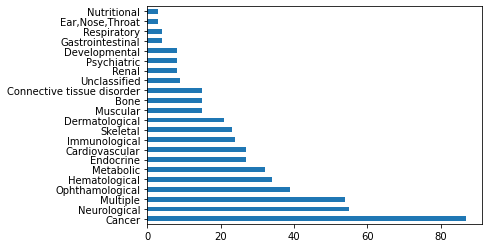

In [19]:
vertices['type'].value_counts().plot(kind='barh')

## Edges

In [2]:
edges = pd.read_csv("Dataset/disease_edges.csv", sep=";")
edges = edges.set_index('id')

edges

,Source,Target,Type,label,timeset,weight
id,,,,,,
1550,1285,858,Directed,NaN,NaN,1.0
1551,468,81,Directed,NaN,NaN,1.0
1552,416,411,Directed,NaN,NaN,1.0
1553,416,417,Directed,NaN,NaN,1.0
1554,126,125,Directed,NaN,NaN,1.0
...,...,...,...,...,...,...
3921,80,365,Directed,NaN,NaN,1.0
3922,80,87,Directed,NaN,NaN,1.0
3923,80,99,Directed,NaN,NaN,1.0


In [3]:
for x in edges.columns[2:]:
    print("Column: ", x)
    print(edges[x].describe())
    print('--')
    
print("Number of edges: ", edges.shape[0])


Column:  Type
count         2368
unique           1
top       Directed
freq          2368
Name: Type, dtype: object
--
Column:  label
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: label, dtype: float64
--
Column:  timeset
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: timeset, dtype: float64
--
Column:  weight
count    2368.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: weight, dtype: float64
--
Number of edges:  2368


- Gli attributi sopra riportati possono essere omessi in quanto presentano lo stesso valore per tutti gli archi
- Il grafo è composto da 2368 **archi diretti**

In [7]:
for i in vertices.index:
    if(edges.loc[edges['Target'] == i]['Source'].size != edges.loc[edges['Source'] == i]['Target'].size):
        print(i)

In [8]:
for i in vertices.index:
    for x in edges.loc[edges['Target'] == i]['Source']:
        if(edges.loc[(edges['Target'] == x) & (edges['Source'] == i)].shape[0] != 1):
            print(i)
       

- La rete per ogni arco presenta anche il proprio reciproco, grazie alle funzionalità di Cytoscape sono stati rimossi i nodi "doppioni" e la rete è stata trasformata da rete diretta a **rete indiretta**
- Il numero di **archi indiretti totali** è: 1184
